In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',99)
item = pd.read_csv("items.csv")
shop = pd.read_csv("shops.csv")
category = pd.read_csv("item_categories.csv")
data = pd.read_csv("Traning set/sales_train_v2.csv")
test_set = pd.read_csv("test.csv")
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


# 各物品月銷量

In [3]:
Item_Index = ['shop_id','item_id','date_block_num']
data_temp1 = data[['shop_id','item_id','date_block_num','item_cnt_day']]
data_month = data_temp1.groupby(by = Item_Index)['item_cnt_day'].agg(['sum']).reset_index().rename(columns = {'sum' : 'item_cnt_month'})
data_month['item_cnt_month'] = data_month['item_cnt_month'].astype(int).fillna(0)
data_month

,shop_id,item_id,date_block_num,item_cnt_month
0,0,30,1,31
1,0,31,1,11
2,0,32,0,6
3,0,32,1,10
4,0,33,0,3
5,0,33,1,3
6,0,35,0,1
7,0,35,1,14
8,0,36,1,1
9,0,40,1,1


# 各物品總銷量

In [ ]:
# Item_Index = ['shop_id','item_id','date_block_num']
data_temp1 = data[['shop_id','item_id','date_block_num','item_cnt_day']]
data_item_total = data_temp1.groupby(by = 'item_id')['item_cnt_day'].agg(['sum']).reset_index().rename(columns = {'sum' : 'item_cnt_total'})
data_item_total['item_cnt_total'] = data_item_total['item_cnt_total'].astype(int).fillna(0)
data_item_total

,item_id,item_cnt_total
0,0,1
1,1,6
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1
7,7,1
8,8,2
9,9,1


# 各品牌總銷量

In [ ]:
data_temp = data[['shop_id','item_id','date_block_num','item_cnt_day']]
data_shop_total = data_temp.groupby(by = 'shop_id')['item_cnt_day'].agg(['sum']).reset_index().rename(columns = {'sum' : 'shop_cnt_total'})
data_shop_total['shop_cnt_total'] = data_shop_total['shop_cnt_total'].astype(int).fillna(0)
data_shop_total

,shop_id,shop_cnt_total
0,0,11705
1,1,6311
2,2,30620
3,3,28355
4,4,43942
5,5,42762
6,6,100489
7,7,67058
8,8,3595
9,9,15866


# 計算相關係數

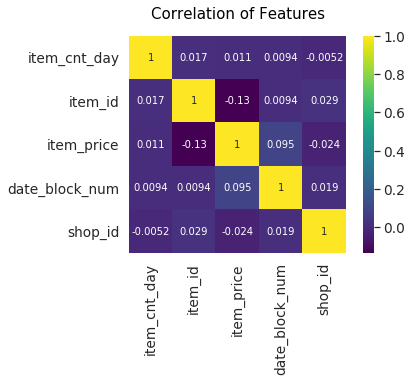

In [ ]:
corr_matrix = data.corr() #相關係數[-1,1],靠近1正相關,靠近-1負相關
k = 10
cols = corr_matrix.nlargest(k,'item_cnt_day')['item_cnt_day'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
colormap = plt.cm.viridis
plt.title('Correlation of Features', y=1.05, size=15, color="black")
sns.heatmap(cm, cmap = colormap, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values) 
plt.show()

# Traning

In [ ]:
#挑選特徵值
X_train = data[['item_id','shop_id']]
X_test = test_set
Y_train = data[['item_cnt_day']]

#feature vectorized
from sklearn.feature_extraction import DictVectorizer
dict_v = DictVectorizer(sparse=False)
X_train = dict_v.fit_transform(X_train.to_dict(orient = 'record'))
X_test = dict_v.transform(X_test.to_dict(orient = 'record'))

#Grandient Boosting Regressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
GBR = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,max_depth=5,verbose=2)
x_train, y_train, x_test, y_test = train_test_split(X_train,Y_train,test_size = 0.1)
preditc_model = GBR.fit(x_train,x_test)
y_predirction = preditc_model.predict(y_train)
mse = metrics.mean_squared_error(y_test,y_predirction)
print("MSE of Gradient Boosting Regressor: ",mse)

/home/aclab/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           7.1363           36.34m
         2           6.9670           36.43m
         3           6.8297           36.63m
         4           6.7805           36.48m
         5           6.6805           36.48m
         6           6.6496           36.39m
         7           6.6228           36.25m
         8           6.5506           36.19m
         9           6.4935           36.09m
        10           6.4720           36.02m
        11           6.4544           35.93m
        12           6.4054           35.82m
        13           6.3891           35.87m
        14           6.3793           35.70m
        15           6.3651           35.61m
        16           6.3305           35.59m
        17           6.3235           35.55m
        18           6.3149           35.37m
        19           6.3063           35.36m
        20           6.2993           35.25m
        21           6.2909           35.18m
        2

       183           5.9633           28.65m
       184           5.9628           28.63m
       185           5.9619           28.59m
       186           5.9611           28.55m
       187           5.9610           28.52m
       188           5.9606           28.49m
       189           5.9605           28.44m
       190           5.9604           28.40m
       191           5.9591           28.37m
       192           5.9588           28.33m
       193           5.9588           28.29m
       194           5.9585           28.25m
       195           5.9584           28.20m
       196           5.9583           28.16m
       197           5.9582           28.12m
       198           5.9580           28.08m
       199           5.9572           28.05m
       200           5.9568           28.02m
       201           5.9563           28.00m
       202           5.9561           27.97m
       203           5.9558           27.93m
       204           5.9558           27.88m
       205

In [ ]:
Y_predict = GBR.predict(X_test)
output = pd.DataFrame({'ID': test_set['ID'], 'item_cnt_month': Y_predict})
output.to_csv('output.csv', index=False,sep=',')